In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import psutil
import humanize
import os

from pathlib import Path
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import random
import cv2
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import ast

#import GPUtil as GPU


In [13]:
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

In [24]:
data = pd.read_json('../data/video-files/F1/F1.json')
data.head()

,index,filename,widht,height,class,xmin,ymin,xmax,ymax,new_path,img_data,new_bb,category
0,0,data/video-files/F1/EmZtTd1YRmA/input/frames/f...,0,0,59,0,0,0,0,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,[[[152 98 105]\n [151 105 111]\n [126 99 1...,[0. 0. 0. 0.],F1
1,1,data/video-files/F1/EmZtTd1YRmA/input/frames/f...,153,47,30,83,985,236,1032,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,[[[131 102 105]\n [168 144 146]\n [255 251 2...,[273. 19. 286. 54.],F1
2,1,data/video-files/F1/EmZtTd1YRmA/input/frames/f...,543,179,98,770,0,1313,179,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,[[[131 102 105]\n [168 144 146]\n [255 251 2...,[ 0. 179. 49. 305.],F1
3,1,data/video-files/F1/EmZtTd1YRmA/input/frames/f...,506,176,98,12,5,518,181,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,[[[131 102 105]\n [168 144 146]\n [255 251 2...,[ 1. 3. 49. 120.],F1
4,1,data/video-files/F1/EmZtTd1YRmA/input/frames/f...,134,48,98,1736,555,1870,603,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,[[[131 102 105]\n [168 144 146]\n [255 251 2...,[154. 404. 167. 434.],F1


In [21]:
data = pd.read_csv('../data/video-files/F1/F1.csv', index_col=[0])
def get_list(x):
    x = x.replace('.', '.0,')
    x = ast.literal_eval(x)
    return np.array(x, dtype=np.float32)

data['new_bb'] = data['new_bb'].apply(get_list)

data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/video-files/F1/F1.csv'

In [17]:
data.iloc[0]['img_data']

'[[[152  98 105]\n  [151 105 111]\n  [126  99 103]\n  ...\n  [155  95  95]\n  [155  95  95]\n  [155  95  95]]\n\n [[154 102 109]\n  [141  97 103]\n  [156 129 133]\n  ...\n  [153  96  95]\n  [154  97  96]\n  [154  97  96]]\n\n [[146 101 104]\n  [140 101 103]\n  [244 220 222]\n  ...\n  [151  97  96]\n  [151  97  96]\n  [150  96  95]]\n\n ...\n\n [[246 234 234]\n  [241 231 231]\n  [239 233 234]\n  ...\n  [120 119 123]\n  [121 120 124]\n  [121 120 124]]\n\n [[243 234 231]\n  [240 232 232]\n  [221 215 216]\n  ...\n  [121 120 124]\n  [121 120 124]\n  [121 120 124]]\n\n [[243 236 233]\n  [227 222 219]\n  [132 126 127]\n  ...\n  [122 121 125]\n  [122 121 125]\n  [122 121 125]]]'

In [18]:
len(data)

10198

In [19]:
from sklearn.model_selection import train_test_split
X = data[['xmin', 'ymin', 'xmax', 'ymax', 'img_data', 'new_path', 'new_bb']]
Y = data['class']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
X_train

,xmin,ymin,xmax,ymax,img_data,new_path,new_bb
4041,0.0,0.0,0.0,0.0,[[[156 128 93]\n [156 128 93]\n [157 129 ...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[0.0, 0.0, 0.0, 0.0]"
4524,0.0,0.0,0.0,0.0,[[[51 68 31]\n [51 68 31]\n [51 68 31]\n .....,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[0.0, 0.0, 0.0, 0.0]"
2918,469.0,940.0,544.0,1028.0,[[[118 120 114]\n [105 107 101]\n [166 168 1...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[261.0, 109.0, 285.0, 126.0]"
2580,0.0,0.0,0.0,0.0,[[[255 245 249]\n [239 212 216]\n [199 163 1...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[0.0, 0.0, 0.0, 0.0]"
2116,0.0,113.0,1315.0,340.0,[[[129 142 140]\n [129 142 140]\n [129 142 1...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[31.0, 0.0, 94.0, 305.0]"
...,...,...,...,...,...,...,...
2779,559.0,353.0,905.0,401.0,[[[207 185 179]\n [207 185 179]\n [205 186 1...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[98.0, 130.0, 111.0, 210.0]"
2466,0.0,0.0,0.0,0.0,[[[ 76 68 55]\n [ 75 67 54]\n [ 74 66 ...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[0.0, 0.0, 0.0, 0.0]"
2551,1501.0,46.0,1562.0,104.0,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 0]\n .....,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[13.0, 349.0, 28.0, 363.0]"
345,0.0,0.0,0.0,0.0,[[[210 198 188]\n [194 184 174]\n [204 193 1...,data/video-files/F1/EmZtTd1YRmA/input/frames_r...,"[0.0, 0.0, 0.0, 0.0]"


In [9]:
null_class = 59
#data = data[data['class']!=null_class]

In [10]:
len(data)

10198

In [12]:
# def create_mask(bb, x):
#     """Creates a mask for the bounding box of same shape as image"""
#     rows,cols,*_ = x.shape
#     Y = np.zeros((rows, cols))
#     bb = bb.astype(np.int)
#     Y[bb[0]:bb[2], bb[1]:bb[3]] = 1.
#     return Y

# def mask_to_bb(Y):
#     """Convert mask Y to a bounding box, assumes 0 as background nonzero object"""
#     cols, rows = np.nonzero(Y)
#     if len(cols)==0: 
#         return np.zeros(4, dtype=np.float32)
#     top_row = np.min(rows)
#     left_col = np.min(cols)
#     bottom_row = np.max(rows)
#     right_col = np.max(cols)
#     return np.array([left_col, top_row, right_col, bottom_row], dtype=np.float32)

# def create_bb_array(x):
#     """Generates bounding box array from a train_df row"""
#     return np.array([x[5],x[4],x[7],x[6]])

# def resize_image_bb(read_path,write_path,bb,sz):
#     """Resize an image and its bounding box and write image to new path"""
#     im = read_image(read_path)
#     im_resized = cv2.resize(im, (int(1.49*sz), sz))
#     Y_resized = cv2.resize(create_mask(bb, im), (int(1.49*sz), sz))
#     new_path = str(write_path/read_path.parts[-1])
#     cv2.imwrite(new_path, cv2.cvtColor(im_resized, cv2.COLOR_RGB2BGR))
#     return new_path, mask_to_bb(Y_resized)

# # modified from fast.ai
# def crop(im, r, c, target_r, target_c): 
#     return im[r:r+target_r, c:c+target_c]

# # random crop to the original size
# def random_crop(x, r_pix=8):
#     """ Returns a random crop"""
#     r, c,*_ = x.shape
#     c_pix = round(r_pix*c/r)
#     rand_r = random.uniform(0, 1)
#     rand_c = random.uniform(0, 1)
#     start_r = np.floor(2*rand_r*r_pix).astype(int)
#     start_c = np.floor(2*rand_c*c_pix).astype(int)
#     return crop(x, start_r, start_c, r-2*r_pix, c-2*c_pix)

# def center_crop(x, r_pix=8):
#     r, c,*_ = x.shape
#     c_pix = round(r_pix*c/r)
#     return crop(x, r_pix, c_pix, r-2*r_pix, c-2*c_pix)

# def rotate_cv(im, deg, y=False, mode=cv2.BORDER_REFLECT, interpolation=cv2.INTER_AREA):
#     """ Rotates an image by deg degrees"""
#     r,c,*_ = im.shape
#     M = cv2.getRotationMatrix2D((c/2,r/2),deg,1)
#     if y:
#         return cv2.warpAffine(im, M,(c,r), borderMode=cv2.BORDER_CONSTANT)
#     return cv2.warpAffine(im,M,(c,r), borderMode=mode, flags=cv2.WARP_FILL_OUTLIERS+interpolation)

# def random_cropXY(x, Y, r_pix=8):
#     """ Returns a random crop"""
#     r, c,*_ = x.shape
#     c_pix = round(r_pix*c/r)
#     rand_r = np.random.uniform(0, 1)
#     rand_c = np.random.uniform(0, 1)
#     start_r = np.floor(2*rand_r*r_pix).astype(int)
#     start_c = np.floor(2*rand_c*c_pix).astype(int)
#     xx = crop(x, start_r, start_c, r-2*r_pix, c-2*c_pix)
#     YY = crop(Y, start_r, start_c, r-2*r_pix, c-2*c_pix)
#     return xx, YY

def transformsXY(x, bb, transforms):
    #x = cv2.imread(str(path)).astype(np.float32)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)/255
    Y = create_mask(bb, x)
    if transforms:
        rdeg = (np.random.random()-.50)*20
        x = rotate_cv(x, rdeg)
        Y = rotate_cv(Y, rdeg, y=True)
        if np.random.random() > 0.5: 
            x = np.fliplr(x).copy()
            Y = np.fliplr(Y).copy()
        x, Y = random_cropXY(x, Y)
    else:
        x, Y = center_crop(x), center_crop(Y)
    return x, mask_to_bb(Y)

# def create_corner_rect(bb, color='red'):
#     bb = np.array(bb, dtype=np.float32)
#     return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color,
#                          fill=False, lw=3)

# def show_corner_bb(im, bb):
#     plt.imshow(im)
#     plt.gca().add_patch(create_corner_rect(bb))
    
# def read_image(filename): return mpimg.imread(filename)

In [13]:
def normalize(im):
    """Normalizes images with Imagenet stats."""
    imagenet_stats = np.array([[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]])
    return (im - imagenet_stats[0])/imagenet_stats[1]

In [14]:
class RoadDataset():
    def __init__(self, paths, bb, y, transforms=False):
        self.transforms = transforms
        self.paths = paths.values
        self.bb = bb.values
        self.y = y.values
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, idx):
        path = self.paths[idx]
        y_class = self.y[idx]
        x, y_bb = transformsXY(path, self.bb[idx], self.transforms)
        x = normalize(x)
        x = np.rollaxis(x, 2)
        return x, y_class, y_bb

In [15]:
# train_ds = RoadDataset(X_train['new_path'],X_train['new_bb'] ,y_train, transforms=True)
# valid_ds = RoadDataset(X_val['new_path'],X_val['new_bb'],y_val)

train_ds = RoadDataset(X_train['img_data'],X_train['new_bb'] ,y_train, transforms=True)
valid_ds = RoadDataset(X_val['img_data'],X_val['new_bb'],y_val)

In [17]:
from torch.utils.data import Dataset, DataLoader

batch_size = 32
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False)
valid_dl = DataLoader(valid_ds, batch_size=batch_size)

In [18]:
from torch import nn
import torchvision.models as models


class BB_model(nn.Module):
    def __init__(self):
        super(BB_model, self).__init__()
        resnet = models.resnet34(pretrained=True)
        layers = list(resnet.children())[:8]
        self.features1 = nn.Sequential(*layers[:6])
        self.features2 = nn.Sequential(*layers[6:])
        self.classifier = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 32))
        self.bb = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 4))
        
    def forward(self, x):
        x = self.features1(x)
        x = self.features2(x)
        x = F.relu(x)
        x = nn.AdaptiveAvgPool2d((1,1))(x)
        x = x.view(x.shape[0], -1)
        return self.classifier(x), self.bb(x)

In [19]:
def update_optimizer(optimizer, lr):
    for i, param_group in enumerate(optimizer.param_groups):
        param_group["lr"] = lr

In [20]:
def train_epocs(model, optimizer, train_dl, val_dl, epochs=10,C=1000):
    idx = 0
    for i in range(epochs):
        model.train()
        total = 0
        sum_loss = 0
        for x, y_class, y_bb in train_dl:
            batch = y_class.shape[0]
            x = x.cuda().float()
            y_class = y_class.cuda()
            y_bb = y_bb.cuda().float()
            out_class, out_bb = model(x)
            loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
            loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
            loss_bb = loss_bb.sum()
            loss = loss_class + loss_bb/C
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            idx += 1
            total += batch
            sum_loss += loss.item()
        train_loss = sum_loss/total
        val_loss, val_acc = val_metrics(model, valid_dl, C)
        print("train_loss %.3f val_loss %.3f val_acc %.3f" % (train_loss, val_loss, val_acc))
    return sum_loss/total

In [21]:
def val_metrics(model, valid_dl, C=1000):
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0 
    for x, y_class, y_bb in valid_dl:
        batch = y_class.shape[0]
        x = x.cuda().float()
        y_class = y_class.cuda()
        y_bb = y_bb.cuda().float()
        out_class, out_bb = model(x)
        loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
        loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
        loss_bb = loss_bb.sum()
        loss = loss_class + loss_bb/C
        _, pred = torch.max(out_class, 1)
        correct += pred.eq(y_class).sum().item()
        sum_loss += loss.item()
        total += batch
    return sum_loss/total, correct/total

In [22]:
import torch
model = BB_model().cuda()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.Adam(parameters, lr=0.004)

AssertionError: Torch not compiled with CUDA enabled

In [29]:
import torch.nn.functional as F
train_epocs(model, optimizer, train_dl, valid_dl, epochs=30)

train_loss 3.237 val_loss 7.648 val_acc 0.095
train_loss 2.569 val_loss 4.984 val_acc 0.273
train_loss 2.274 val_loss 2.392 val_acc 0.279
train_loss 2.219 val_loss 2.313 val_acc 0.322
train_loss 1.983 val_loss 2.281 val_acc 0.325
train_loss 1.950 val_loss 2.047 val_acc 0.344
train_loss 1.851 val_loss 2.091 val_acc 0.420
train_loss 1.801 val_loss 2.148 val_acc 0.387
train_loss 1.788 val_loss 2.139 val_acc 0.294
train_loss 1.730 val_loss 2.231 val_acc 0.371
train_loss 1.671 val_loss 1.878 val_acc 0.420
train_loss 1.665 val_loss 2.314 val_acc 0.337
train_loss 1.656 val_loss 5.030 val_acc 0.221
train_loss 1.625 val_loss 2.195 val_acc 0.377
train_loss 1.572 val_loss 2.116 val_acc 0.383
train_loss 1.560 val_loss 2.223 val_acc 0.393
train_loss 1.545 val_loss 2.143 val_acc 0.396
train_loss 1.530 val_loss 1.737 val_acc 0.472
train_loss 1.510 val_loss 1.625 val_acc 0.454
train_loss 1.453 val_loss 1.674 val_acc 0.482
train_loss 1.450 val_loss 2.544 val_acc 0.423
train_loss 1.491 val_loss 1.790 va

1.3841537358210636

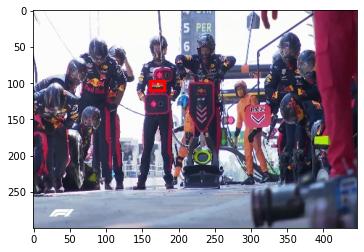

In [58]:
#original
frame = str(data.values[6][-2])
im = cv2.imread(frame)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
show_corner_bb(im, data.values[6][-1])

In [59]:
# resizing test image
im = read_image(frame)
im = cv2.resize(im, (int(1.49*300), 300))
cv2.imwrite(frame, cv2.cvtColor(im, cv2.COLOR_RGB2BGR))

True

In [60]:
# test Dataset
test_ds = RoadDataset(pd.DataFrame([{'path':frame}])['path'],pd.DataFrame([{'bb':np.array([0,0,0,0])}])['bb'],pd.DataFrame([{'y':[0]}])['y'])
x, y_class, y_bb = test_ds[0]

In [61]:
xx = torch.FloatTensor(x[None,])
xx.shape

torch.Size([1, 3, 284, 423])

In [62]:
# prediction
out_class, out_bb = model(xx.cuda())
out_class, out_bb

(tensor([[  0.9999,  -7.9939, -15.8801,   2.9928, -11.0146,  -1.8281,  -3.5767,
          -10.5667,  -4.5197,   2.6493,   1.9368,  -6.5460,   1.7192,   3.3106,
           -6.7393,   2.3611,   6.1967,   4.2918,  -7.4719,   0.2239,  -4.0652,
            1.2341,  -9.8202, -12.9261,   1.9541,  -5.3757,  -5.6182,  -8.8926,
           10.0254,  -9.4075,  -3.3164,   0.3506]], device='cuda:0',
        grad_fn=<AddmmBackward>),
 tensor([[ 17.6212, 197.1440,  39.8469, 211.0516]], device='cuda:0',
        grad_fn=<AddmmBackward>))

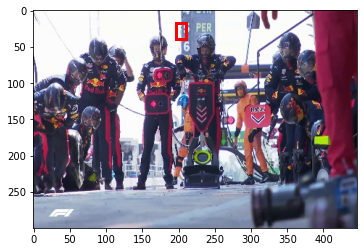

In [63]:
# predicted bounding box
bb_hat = out_bb.detach().cpu().numpy()
bb_hat = bb_hat.astype(int)
show_corner_bb(im, bb_hat[0])

In [41]:
data.head()

,filename,widht,height,class,xmin,ymin,xmax,ymax,new_path,new_bb
1425,../data/F1 Hamilton/input/frames/frame3.jpg,41,46,16,698,437,739,483,frames_resized/frame3.jpg,"[121.0, 162.0, 133.0, 171.0]"
1426,../data/F1 Hamilton/input/frames/frame6.jpg,41,46,16,701,440,742,486,frames_resized/frame6.jpg,"[122.0, 163.0, 134.0, 172.0]"
1427,../data/F1 Hamilton/input/frames/frame8.jpg,42,46,16,703,444,745,490,frames_resized/frame8.jpg,"[123.0, 164.0, 135.0, 173.0]"
903,../data/F1 Hamilton/input/frames/frame8.jpg,54,75,27,1665,552,1719,627,frames_resized/frame8.jpg,"[153.0, 388.0, 173.0, 399.0]"
1428,../data/F1 Hamilton/input/frames/frame11.jpg,44,46,16,705,442,749,488,frames_resized/frame11.jpg,"[123.0, 164.0, 135.0, 173.0]"
